In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_path = '/Users/phuongnguyen/Documents/Code Github/geospatial-data-science-labs/london_house_project/london_house_price_data/london_house_price/kaggle_london_house_price_data.csv'
data = pd.read_csv(data_path)
data.head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,...,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,1.0,1.0,45.0,1.0,...,630000.0,HIGH,2024-10-07T13:26:59.894Z,244000.0,68.539326,2010-03-30,1995-01-02,830000,NaN,NaN
1,"Flat 6, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,NaN,NaN,NaN,NaN,...,660000.0,MEDIUM,2024-10-07T13:26:59.894Z,425000.0,242.857143,2000-05-26,1995-01-02,830000,NaN,NaN
2,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,England,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,...,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950,NaN,NaN
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,England,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,...,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000,NaN,NaN
4,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,...,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000,NaN,NaN


In [17]:
print(data.columns)

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')


In [3]:
data.describe()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,history_price,history_percentageChange,history_numericChange
count,418201.000000,418201.000000,340270.000000,377665.000000,392991.000000,357701.000000,416460.000000,416460.000000,416460.000000,4.175610e+05,4.175610e+05,4.175610e+05,4.175610e+05,417561.000000,4.182010e+05,237982.000000,2.379820e+05
mean,51.507522,-0.101426,1.444265,2.474884,98.926543,1.282275,3299.054171,3639.487466,3980.117298,8.312692e+05,9.045188e+05,9.777633e+05,2.886077e+04,29.278605,6.395840e+05,105.877778,2.528741e+05
std,0.056171,0.086930,0.724478,1.160506,55.938911,0.574412,3168.625404,3487.801945,3808.508868,8.088434e+05,9.202917e+05,1.037913e+06,1.080893e+06,362.350731,1.327933e+06,338.849944,8.024032e+05
min,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,300.000000,350.000000,400.000000,8.100000e+04,8.900000e+04,9.300000e+04,-1.053770e+08,-99.763196,1.000000e+04,-99.890110,-7.390000e+07
25%,51.464315,-0.155996,1.000000,2.000000,63.000000,1.000000,1800.000000,1950.000000,2100.000000,4.160000e+05,4.460000e+05,4.750000e+05,1.100000e+04,2.105263,2.280000e+05,17.833333,4.849500e+04
50%,51.501581,-0.108482,1.000000,2.000000,84.000000,1.000000,2350.000000,2600.000000,2850.000000,5.810000e+05,6.220000e+05,6.630000e+05,3.500000e+04,6.260870,4.000000e+05,52.857143,1.300000e+05
75%,51.548515,-0.043582,2.000000,3.000000,116.000000,1.000000,3550.000000,3950.000000,4300.000000,9.130000e+05,9.840000e+05,1.054000e+06,8.600000e+04,13.554987,6.650000e+05,114.285714,2.870000e+05
max,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,111500.000000,121200.000000,130900.000000,2.337600e+07,2.922000e+07,3.506400e+07,2.268100e+07,48860.000000,1.058000e+08,48800.770000,6.382000e+07


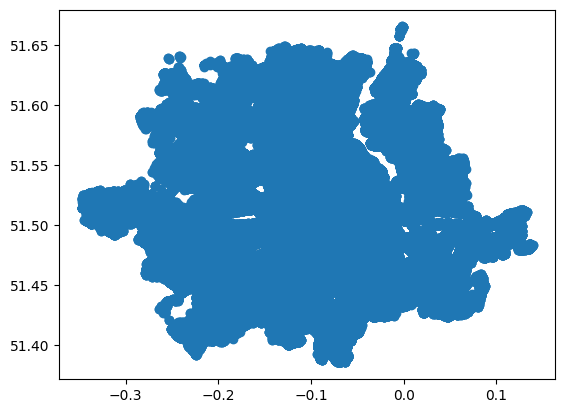

In [11]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(data['longitude'],data['latitude'], 'o')
plt.show()

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


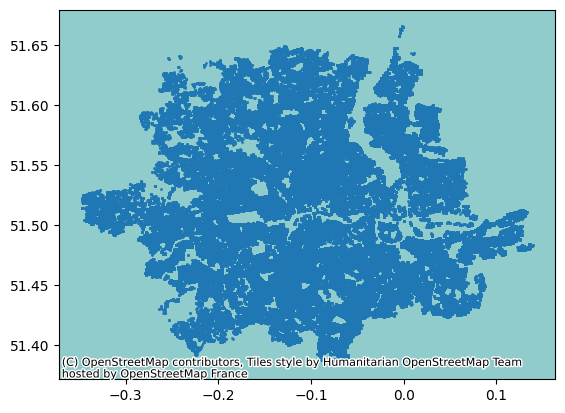

In [ ]:
fig, ax = plt.subplots()
ax.plot(data['longitude'], data['latitude'], 'o', markersize=1)
ctx.add_basemap(ax)
plt.show()

In [13]:
houses = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.longitude, data.latitude),
    crs="EPSG:4326"
)

In [14]:
# Load borough polygons
boroughs = gpd.read_file('/Users/phuongnguyen/Documents/Code Github/geospatial-data-science-labs/london_house_project/london_boroughs/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp')
boroughs = boroughs.to_crs("EPSG:4326")

In [15]:
# Spatial join to find which borough each house is in
houses_borough = gpd.sjoin(
    houses,
    boroughs,
    how="left",
    predicate="within"
)

In [18]:
# Calculate average price per borough
borough_price = (
    houses_borough
    .groupby("NAME")["saleEstimate_currentPrice"]
    .mean()          # hoặc median
    .reset_index()
)


In [19]:
boroughs_price = boroughs.merge(
    borough_price,
    on="NAME",
    how="left"
)


<Axes: >

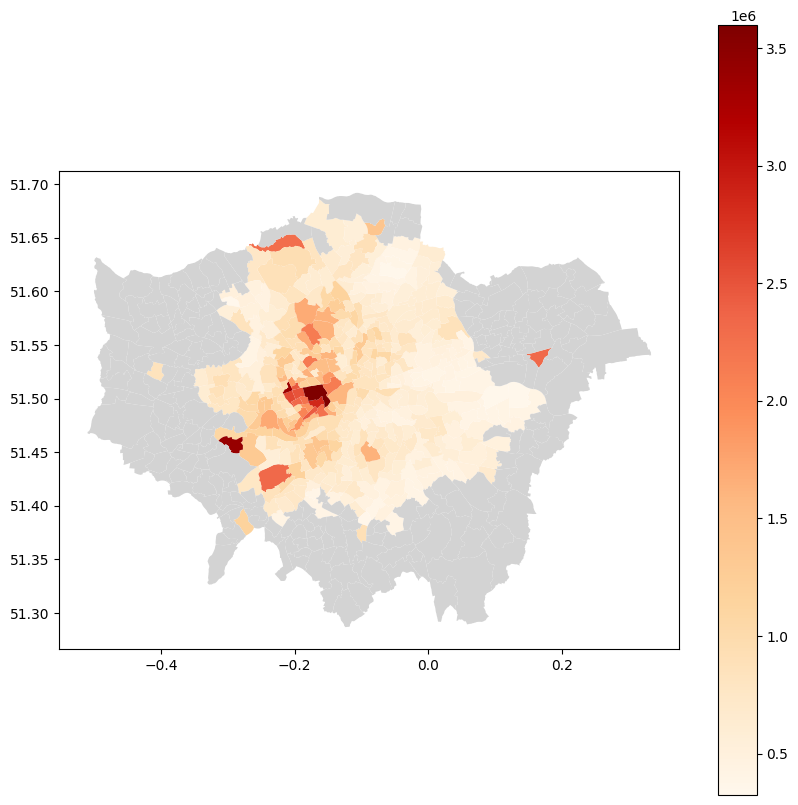

In [21]:
boroughs_price.plot(
    column="saleEstimate_currentPrice",
    cmap="OrRd",
    legend=True,
    figsize=(10, 10),
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)
